<a href="https://colab.research.google.com/github/ParsaKeerthana/DataMiningAssignment3/blob/main/Mobile_Price_Classficiation_using_SEMMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/Mobile_Price_Prediction.csv')
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
# Checking the data types of each column
data_types = data.dtypes

# Checking for missing values
missing_values = data.isnull().sum()

# Generating basic statistics of the numerical columns
data_description = data.describe()

data_types, missing_values, data_description

(battery_power      int64
 blue               int64
 clock_speed      float64
 dual_sim           int64
 fc                 int64
 four_g             int64
 int_memory         int64
 m_dep            float64
 mobile_wt          int64
 n_cores            int64
 pc                 int64
 px_height          int64
 px_width           int64
 ram                int64
 sc_h               int64
 sc_w               int64
 talk_time          int64
 three_g            int64
 touch_screen       int64
 wifi               int64
 price_range        int64
 dtype: object,
 battery_power    0
 blue             0
 clock_speed      0
 dual_sim         0
 fc               0
 four_g           0
 int_memory       0
 m_dep            0
 mobile_wt        0
 n_cores          0
 pc               0
 px_height        0
 px_width         0
 ram              0
 sc_h             0
 sc_w             0
 talk_time        0
 three_g          0
 touch_screen     0
 wifi             0
 price_range      0
 dtype: int64,
   

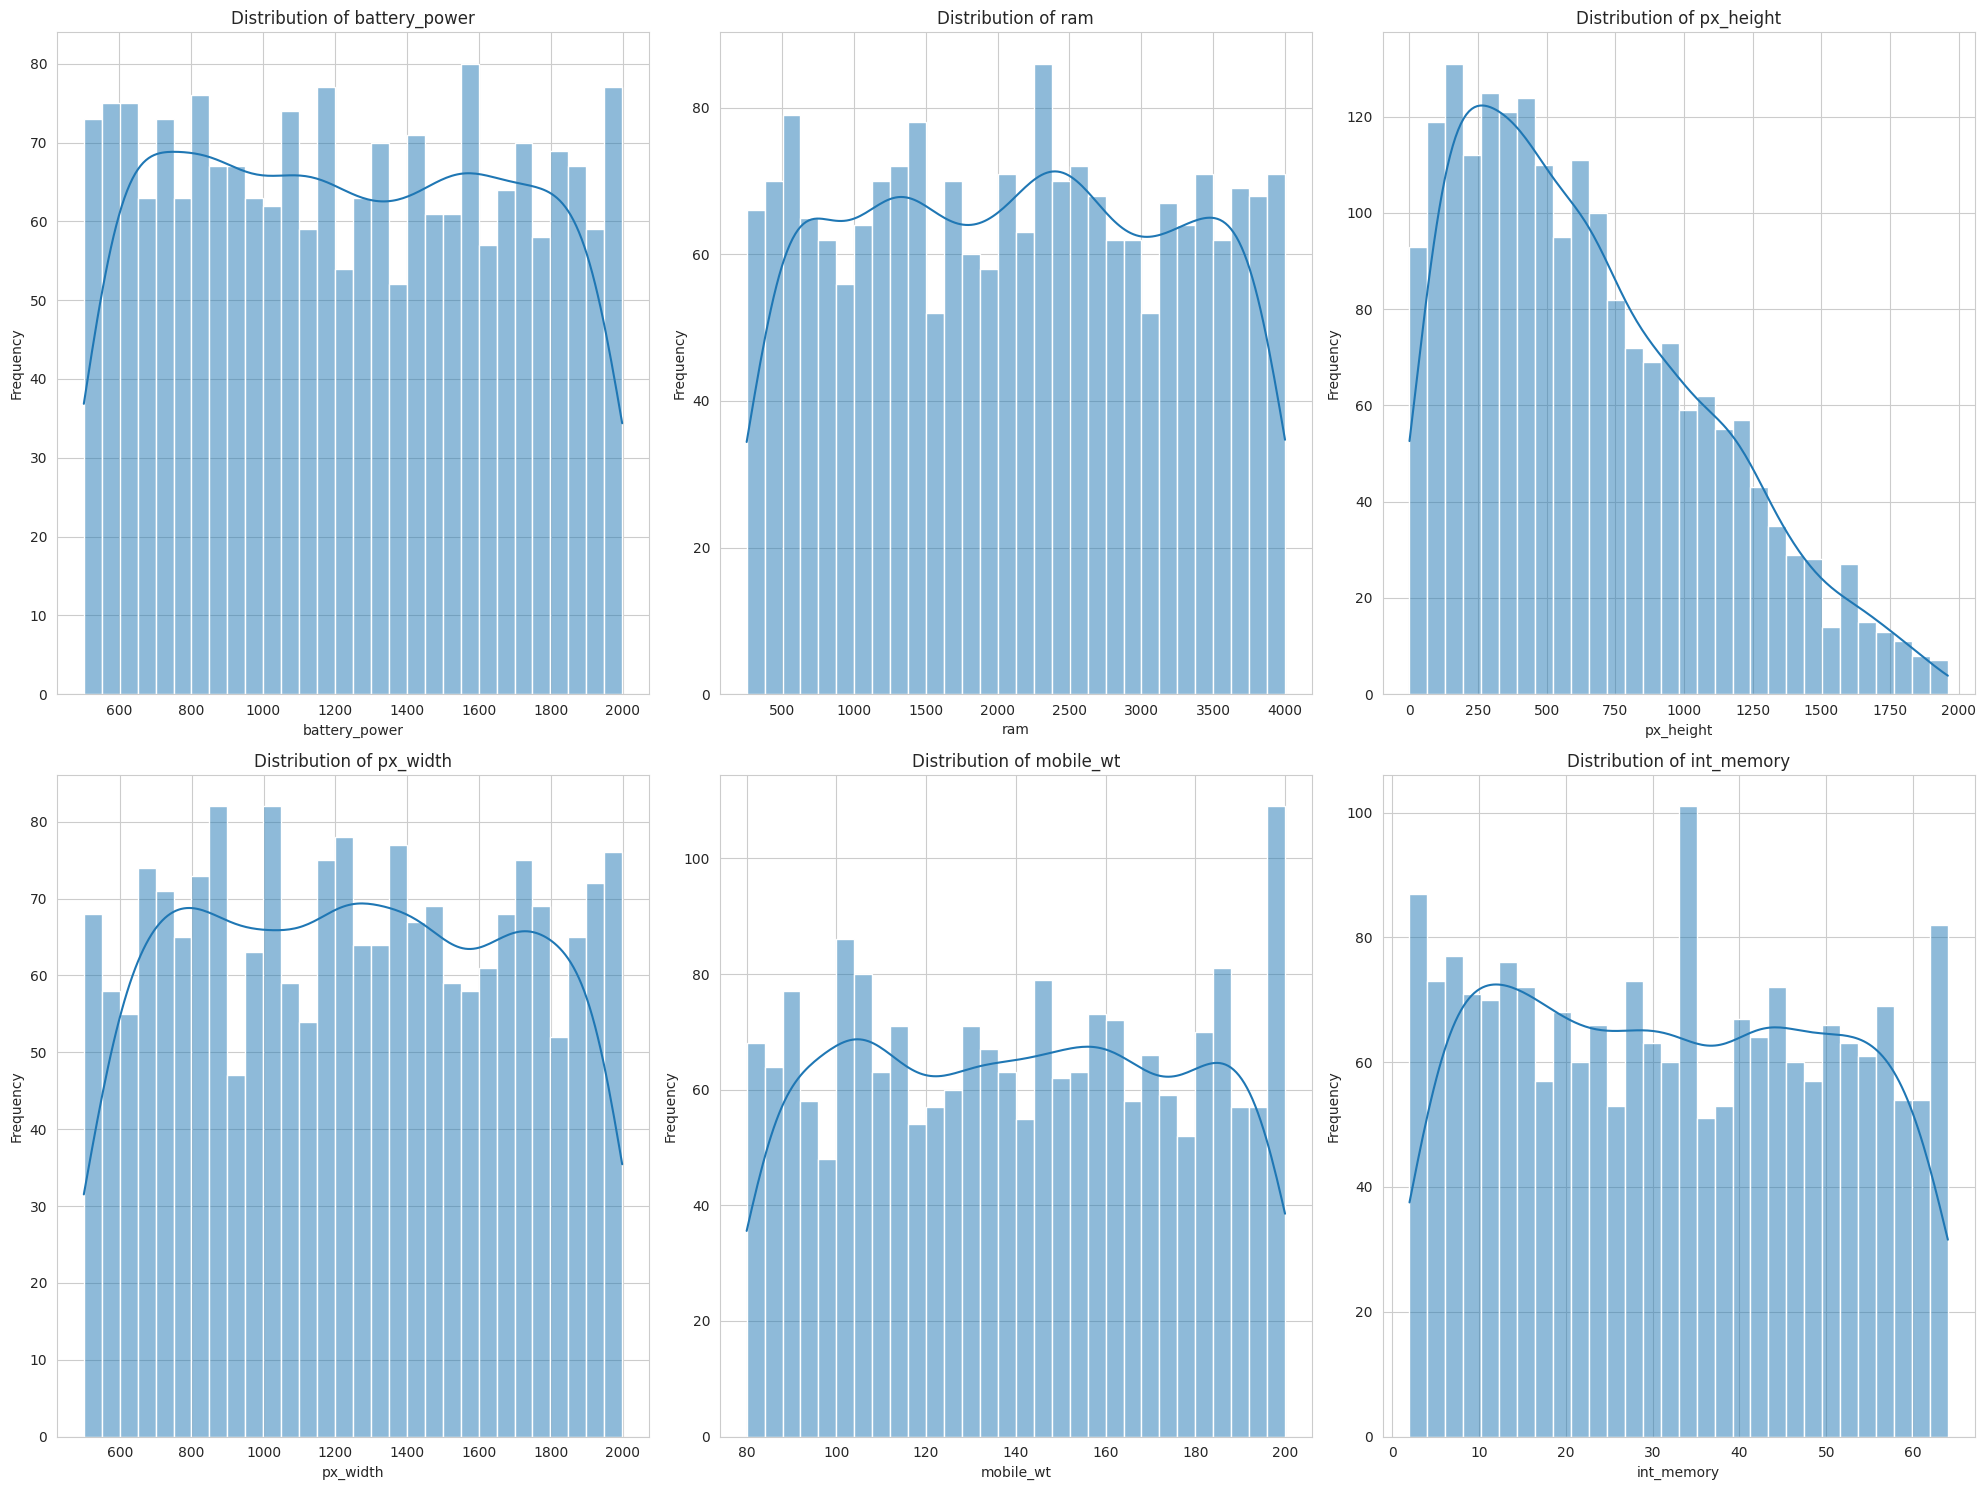

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the aesthetics for the plots
sns.set_style("whitegrid")

# Initialize the figure
plt.figure(figsize=(20, 15))

# Plotting histogram for key features
features_to_plot = ['battery_power', 'ram', 'px_height', 'px_width', 'mobile_wt', 'int_memory']

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

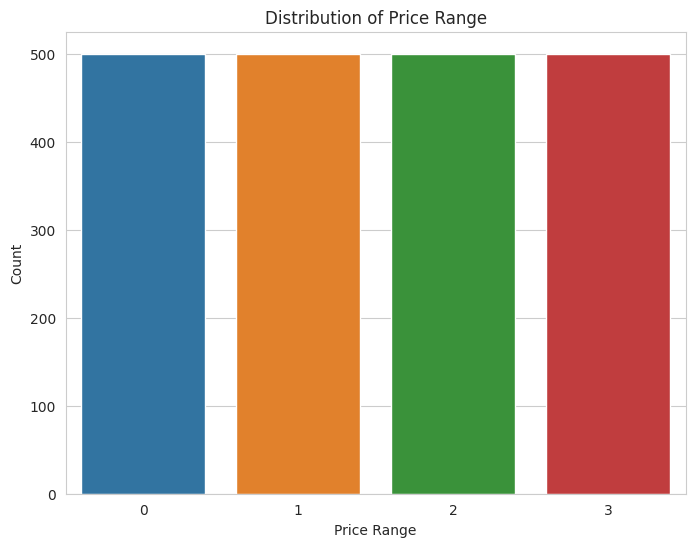

In [ ]:

# Plotting the distribution of the target variable 'price_range'
plt.figure(figsize=(8, 6))
sns.countplot(x='price_range', data=data)
plt.title('Distribution of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()


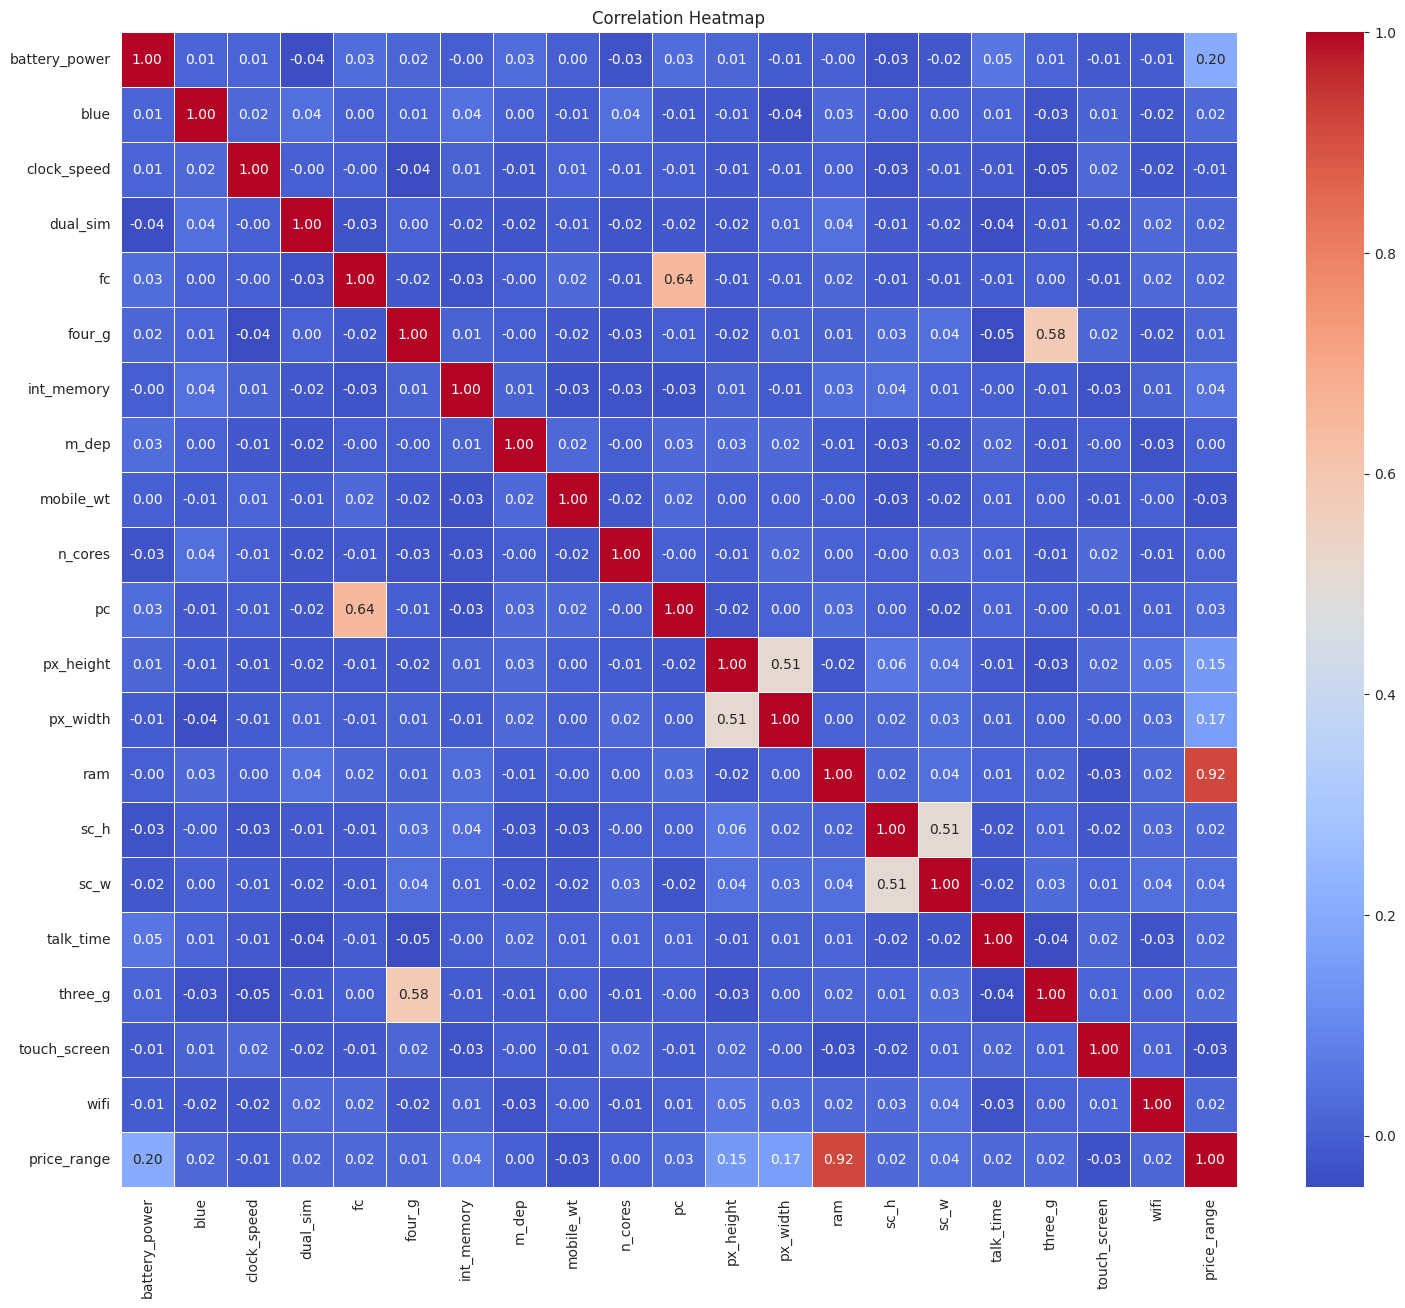

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

In [ ]:
# Calculating the correlation matrix
correlation_matrix = data.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Extracting the correlation values with the target variable 'price_range' and sorting them
correlation_with_target = correlation_matrix['price_range'].sort_values(ascending=False)
correlation_with_target


In [ ]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 18.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 80.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.0 MB/s eta 0:

In [ ]:
# Importing necessary modules from pycaret
from pycaret.classification import *

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Displaying the shape of the training and test sets
train_data.shape, test_data.shape

((1600, 21), (400, 21))

In [ ]:

# Setting up the pycaret environment
# Here, we are ignoring the features that have very weak correlation
# with the target to simplify the model
ignore_features = ['m_dep', 'clock_speed', 'n_cores', 'four_g', 'dual_sim', 'wifi', 'blue',
                   'talk_time', 'fc', 'sc_h', 'three_g', 'pc', 'sc_w']

clf1 = setup(train_data, target='price_range', ignore_features=ignore_features, session_id=123)

,Description,Value
0,Session id,123
1,Target,price_range
2,Target type,Multiclass
3,Original data shape,"(1600, 21)"
4,Transformed data shape,"(1600, 8)"
5,Transformed train set shape,"(1120, 8)"
6,Transformed test set shape,"(480, 8)"
7,Ignore features,13
8,Numeric features,7
9,Preprocess,True


In [ ]:
# Train and compare multiple models
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9429,0.9966,0.9429,0.9448,0.9428,0.9238,0.9245,0.0220
lda,Linear Discriminant Analysis,0.9420,0.9952,0.9420,0.9459,0.9421,0.9226,0.9238,0.0380
knn,K Neighbors Classifier,0.9089,0.9869,0.9089,0.9115,0.9086,0.8785,0.8795,0.0600
lightgbm,Light Gradient Boosting Machine,0.9062,0.9864,0.9062,0.9098,0.9063,0.8750,0.8761,1.4550
et,Extra Trees Classifier,0.8982,0.9840,0.8982,0.9016,0.8977,0.8643,0.8656,0.2790
xgboost,Extreme Gradient Boosting,0.8964,0.9869,0.8964,0.9007,0.8966,0.8619,0.8631,0.2520
gbc,Gradient Boosting Classifier,0.8857,0.9831,0.8857,0.8890,0.8850,0.8476,0.8491,0.6360
rf,Random Forest Classifier,0.8812,0.9828,0.8812,0.8857,0.8810,0.8416,0.8432,0.2080
dt,Decision Tree Classifier,0.8214,0.8808,0.8214,0.8233,0.8205,0.7618,0.7630,0.0450
nb,Naive Bayes,0.7911,0.9477,0.7911,0.7954,0.7907,0.7213,0.7229,0.0430


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
qda_model = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9286,0.9940,0.9286,0.9294,0.9285,0.9047,0.9050
1,0.9375,0.9954,0.9375,0.9383,0.9374,0.9166,0.9169
2,0.9554,0.9983,0.9554,0.9600,0.9555,0.9404,0.9419
3,0.9107,0.9965,0.9107,0.9125,0.9093,0.8810,0.8825
4,0.9821,1.0000,0.9821,0.9827,0.9821,0.9762,0.9764
5,0.9464,0.9975,0.9464,0.9476,0.9466,0.9286,0.9289
6,0.9464,0.9974,0.9464,0.9489,0.9458,0.9286,0.9297
7,0.9286,0.9938,0.9286,0.9329,0.9297,0.9048,0.9054
8,0.9554,0.9975,0.9554,0.9553,0.9552,0.9405,0.9406


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_model = tune_model(qda_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9286,0.9924,0.9286,0.9279,0.9281,0.9047,0.9048
1,0.9464,0.9937,0.9464,0.9478,0.9463,0.9285,0.9290
2,0.9643,0.9990,0.9643,0.9648,0.9639,0.9524,0.9528
3,0.9196,0.9951,0.9196,0.9260,0.9179,0.8929,0.8960
4,0.9821,1.0000,0.9821,0.9827,0.9820,0.9762,0.9765
5,0.9554,0.9991,0.9554,0.9557,0.9554,0.9405,0.9406
6,0.9643,0.9963,0.9643,0.9655,0.9639,0.9524,0.9530
7,0.9196,0.9932,0.9196,0.9230,0.9203,0.8929,0.8935
8,0.9464,0.9981,0.9464,0.9480,0.9457,0.9286,0.9296


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
final_model = finalize_model(tuned_model)

In [ ]:
predictions = predict_model(final_model, data=test_data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.9675,0.9990,0.9675,0.9677,0.9673,0.9565,0.9567
